# Hessenberg Assignment

In [72]:
#using Pkg
#Pkg.add("Distributions")
#Pkg.add("LinearAlgebra")

using Distributions
using LinearAlgebra
using Plots

## Question 1
### Implement and test a Julia function with A as input that returns a positive sub-diagonal upper Hessenberg matrix H with the same eigenvalues as A. Call your function Hess1.

In [65]:
function Hess1(A, m)
    H = copy(A);
    i = 1;
    
    while (i < m - 1)
        u = H[:, i];
        u[1 : i] *= 0.0;
        u[i + 1] -= norm(u);
        u = normalize(u);
        Q = I - 2.0 * kron(u, u');
        H = Q * H * Q';
        i += 1;
    end
    
    display(eigvals(A));
    display(eigvals(H));
    display(H);
    display(norm(eigvals(H)-eigvals(A)))
    
    return H;
end

Hess1 (generic function with 1 method)

## Question 2 - Ashton
### Modify your code from Q1 to take an additional argument that says how many steps to take.  Call your function Hess2.

In [66]:
function Hess2(A,m,n)
    H = copy(A);
    i = 1;
    
    for i in 1:n
        u = H[:, i];
        u[1 : i] *= 0.0;
        u[i + 1] -= norm(u);
        u/= norm(u);
        Q = Matrix(I, m, m)- 2 * kron(u, u');
        H = Q * H * Q';
    end
    
    display(triu(H,-1))
    display(eigvals(A))
    display(eigvals(H))
    display(norm(eigvals(H)-eigvals(A)))
    
    return H
end

Hess2 (generic function with 1 method)

## Question 3 - Isaac
### Modify your code from Q2 to run from the bottom up.  Call your function Hess3.

In [67]:
function Hess3(A,m,n)
    H = copy(A);
    
    for i in m:-1:m-n+1
        u = H[i, :];
        u[i : m] *= 0.0;
        u[i - 1] -= norm(u);
        u/= norm(u);
        Q = Matrix(I, m, m)- 2 * kron(u, u');
        H = Q * H * Q';
    end
    
    display(H)
    display(eigvals(A))
    display(eigvals(H))
    display(norm(eigvals(H)-eigvals(A)))
    
    return H
end

Hess3 (generic function with 2 methods)

## Question 4 - Jenni
### Run Hess2 halfway up a matrix A to get a matrix H2.  Run Hess3 on H2 to get a matrix H3. Describe the structure of the matrix H3.

In [73]:
m = 300;
A = rand(Uniform(-1.0, 1.0), (m, m))

300×300 Matrix{Float64}:
  0.609953   0.299078      0.569535   …   0.65727     0.474635   -0.99284
 -0.189805   0.672257     -0.345563      -0.661196   -0.0409186  -0.409909
  0.958981   0.363768     -0.195597       0.914233    0.959376   -0.695207
  0.361661   0.719829      0.633005      -0.817049    0.719573    0.0542482
 -0.492654   0.609471     -0.376766       0.434578    0.143686   -0.768169
 -0.7422     0.58291      -0.373049   …  -0.0444509   0.339185   -0.679615
 -0.163584  -0.99031      -0.388621      -0.162762   -0.420548    0.159942
  0.464485  -0.867018      0.930201       0.912703   -0.200043    0.406034
 -0.350413  -0.436758     -0.50712       -0.95527    -0.855349    0.670149
 -0.944375   0.984901      0.380225      -0.787981    0.374187    0.0761247
  0.964761  -0.0113304    -0.264548   …  -0.154015    0.907239   -0.0388279
 -0.574668  -0.541837      0.425179      -0.241713    0.792782    0.0253652
 -0.857661  -0.774366      0.611046      -0.165963    0.863142   -0.9129

300×300 Matrix{Float64}:
  0.609935  -0.80009   -0.360094  …   1.13604     0.77804    -0.915581
 10.3278     0.793843   0.380499     -0.187635   -0.431066    0.0567492
  0.0        9.47841   -0.553204     -0.818323    0.870485    0.618054
  0.0        0.0        9.44275       0.069892   -0.578956    1.04316
  0.0        0.0        0.0           1.22694    -0.0800912   0.0739932
  0.0        0.0        0.0       …  -0.012149   -0.155299    0.411582
  0.0        0.0        0.0          -0.226677   -1.39411     0.451837
  0.0        0.0        0.0          -0.785806    0.836908    0.136697
  0.0        0.0        0.0          -0.370365   -0.230002   -0.197556
  0.0        0.0        0.0          -0.634847    0.129209   -0.447312
  0.0        0.0        0.0       …  -0.371228    0.119615    0.179241
  0.0        0.0        0.0           0.248755    0.157146   -0.0467207
  0.0        0.0        0.0          -0.451007    0.304376    0.3957
  ⋮                               ⋱                 

300-element Vector{ComplexF64}:
 -9.345286722089602 - 2.0120571687711717im
 -9.345286722089602 + 2.0120571687711717im
 -9.213345909556516 - 3.4424233131834723im
 -9.213345909556516 + 3.4424233131834723im
 -8.877082966867796 + 0.0im
 -8.830224317764984 - 1.1047599094640759im
 -8.830224317764984 + 1.1047599094640759im
 -8.610232260069765 - 1.5162066419747708im
 -8.610232260069765 + 1.5162066419747708im
  -8.48841036950531 - 3.4085669095426065im
  -8.48841036950531 + 3.4085669095426065im
 -8.389572329089223 - 1.2469127453701272im
 -8.389572329089223 + 1.2469127453701272im
                    ⋮
  8.473795391230592 + 0.9365028693375649im
  8.739930792647716 - 3.603602594399802im
  8.739930792647716 + 3.603602594399802im
   8.78212109560262 - 2.662784316846256im
   8.78212109560262 + 2.662784316846256im
  8.839339511080015 - 1.350367550420813im
  8.839339511080015 + 1.350367550420813im
   8.89039975906612 - 0.5297179330466006im
   8.89039975906612 + 0.5297179330466006im
  9.408641246834755 -

300-element Vector{ComplexF64}:
 -9.345286722089632 - 2.012057168771195im
 -9.345286722089632 + 2.012057168771195im
 -9.213345909556544 - 3.4424233131834834im
 -9.213345909556544 + 3.4424233131834834im
 -8.877082966867869 + 0.0im
 -8.830224317765053 - 1.1047599094640603im
 -8.830224317765053 + 1.1047599094640603im
  -8.61023226006971 - 1.5162066419747562im
  -8.61023226006971 + 1.5162066419747562im
  -8.48841036950527 - 3.4085669095425932im
  -8.48841036950527 + 3.4085669095425932im
 -8.389572329089258 - 1.24691274537013im
 -8.389572329089258 + 1.24691274537013im
                    ⋮
  8.473795391230606 + 0.9365028693375868im
  8.739930792647693 - 3.6036025943997747im
  8.739930792647693 + 3.6036025943997747im
  8.782121095602614 - 2.6627843168462277im
  8.782121095602614 + 2.6627843168462277im
  8.839339511079991 - 1.3503675504208301im
  8.839339511079991 + 1.3503675504208301im
  8.890399759066106 - 0.5297179330465803im
  8.890399759066106 + 0.5297179330465803im
   9.40864124683482 -

7.298390472084671e-13

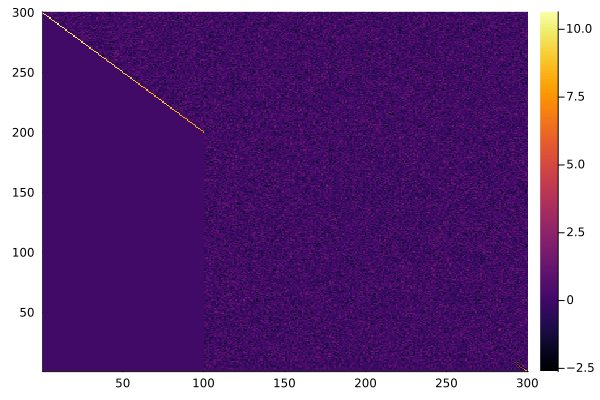

In [77]:
L=Hess2(A,m,100)
heatmap(L[end:-1:1, 1:1:end])

300×300 Matrix{Float64}:
  0.609935     -0.766733      0.11343      …   0.778849   -0.915581
 10.3238        0.755544      0.492396        -0.452985    0.0342079
 -0.0553466     8.78801      -1.35643          0.695928    0.303206
 -0.0883728    -1.23137       6.37236         -0.616963    0.525753
  0.0422645     0.398483     -1.28718          0.678413    0.322592
 -0.000518122   0.0579827     0.760753     …   0.351697    0.273938
  0.00705282    0.0834117     0.100769        -0.790821    0.568164
  0.0212375     0.301529      0.789676         1.02351     1.48442
 -0.000997799  -0.0106098     0.0384182        0.193451   -0.558583
 -0.0058477    -0.123558     -0.779563         0.237903   -1.03411
  0.0108609     0.137421      0.171247     …   0.291943    0.215356
 -0.00254254    0.00866905    0.499549        -0.517813   -0.814956
  0.0160016     0.181991      0.0163721       -0.542968    0.511007
  ⋮                                        ⋱              
  7.38342e-17   1.18395e-16   2.1

300-element Vector{ComplexF64}:
 -9.345286722089602 - 2.0120571687711717im
 -9.345286722089602 + 2.0120571687711717im
 -9.213345909556516 - 3.4424233131834723im
 -9.213345909556516 + 3.4424233131834723im
 -8.877082966867796 + 0.0im
 -8.830224317764984 - 1.1047599094640759im
 -8.830224317764984 + 1.1047599094640759im
 -8.610232260069765 - 1.5162066419747708im
 -8.610232260069765 + 1.5162066419747708im
  -8.48841036950531 - 3.4085669095426065im
  -8.48841036950531 + 3.4085669095426065im
 -8.389572329089223 - 1.2469127453701272im
 -8.389572329089223 + 1.2469127453701272im
                    ⋮
  8.473795391230592 + 0.9365028693375649im
  8.739930792647716 - 3.603602594399802im
  8.739930792647716 + 3.603602594399802im
   8.78212109560262 - 2.662784316846256im
   8.78212109560262 + 2.662784316846256im
  8.839339511080015 - 1.350367550420813im
  8.839339511080015 + 1.350367550420813im
   8.89039975906612 - 0.5297179330466006im
   8.89039975906612 + 0.5297179330466006im
  9.408641246834755 -

300-element Vector{ComplexF64}:
 -9.345286722089618 - 2.012057168771163im
 -9.345286722089618 + 2.012057168771163im
  -9.21334590955654 - 3.44242331318348im
  -9.21334590955654 + 3.44242331318348im
 -8.877082966867889 + 0.0im
 -8.830224317765026 - 1.1047599094640599im
 -8.830224317765026 + 1.1047599094640599im
 -8.610232260069745 - 1.5162066419747628im
 -8.610232260069745 + 1.5162066419747628im
 -8.488410369505292 - 3.4085669095426065im
 -8.488410369505292 + 3.4085669095426065im
 -8.389572329089244 - 1.246912745370139im
 -8.389572329089244 + 1.246912745370139im
                    ⋮
  8.473795391230635 + 0.9365028693376034im
  8.739930792647648 - 3.6036025943997694im
  8.739930792647648 + 3.6036025943997694im
  8.782121095602573 - 2.6627843168462357im
  8.782121095602573 + 2.6627843168462357im
  8.839339511079949 - 1.3503675504208377im
  8.839339511079949 + 1.3503675504208377im
  8.890399759066158 - 0.529717933046572im
  8.890399759066158 + 0.529717933046572im
   9.40864124683479 - 1.8

7.969067250153497e-13

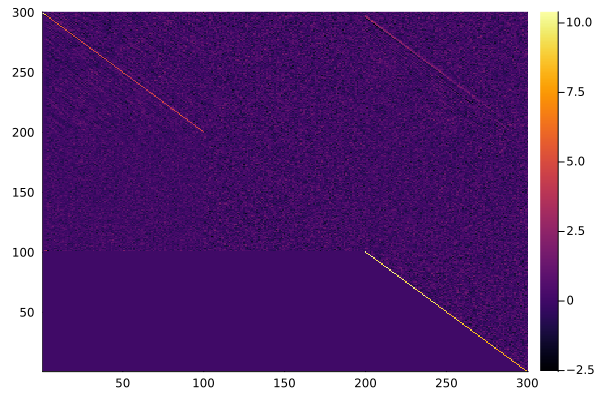

In [78]:
G=Hess3(A,m,100)
heatmap(G[end:-1:1, 1:1:end])

## Testing

In [5]:
m = 6;
A = rand(Uniform(-1.0, 1.0), (m, m))

6×6 Matrix{Float64}:
  0.501484   -0.0957947  -0.470941  -0.53861    0.224      0.265148
 -0.336857   -0.12082    -0.797865   0.623683   0.800059  -0.422894
 -0.0689674  -0.494483   -0.389551   0.69819    0.909659   0.494362
 -0.587236   -0.666842    0.136347  -0.909383  -0.654119  -0.23505
 -0.871211    0.876469   -0.952247  -0.734376  -0.181709   0.435525
  0.492219    0.935036   -0.160241   0.264087  -0.866861   0.785179

In [64]:
Hess3(A,m,4)

6×6 Matrix{Float64}:
  0.829697      0.323343      0.100562     …  -0.61206     0.0698322
 -1.09858      -0.582497     -0.682085        -0.504967    0.572014
 -1.32937e-16   0.880038      0.0865341        0.391004    0.221237
 -1.26146e-17  -1.95655e-17   1.2728           0.0225113   0.211191
 -3.23634e-17  -1.14883e-18  -1.45081e-17     -0.570493   -0.559324
 -1.09402e-16   5.6797e-17   -1.5271e-16   …   1.40123     0.785179

6-element Vector{ComplexF64}:
 -1.271415846816232 - 0.8433963801976924im
 -1.271415846816232 + 0.8433963801976924im
 0.2042623765310138 - 0.961554357024547im
 0.2042623765310138 + 0.961554357024547im
 0.9097535114840485 - 0.3338389229456241im
 0.9097535114840485 + 0.3338389229456241im

6-element Vector{ComplexF64}:
 -1.2714158468162298 - 0.8433963801976915im
 -1.2714158468162298 + 0.8433963801976915im
  0.2042623765310144 - 0.9615543570245465im
  0.2042623765310144 + 0.9615543570245465im
  0.9097535114840496 - 0.3338389229456234im
  0.9097535114840496 + 0.3338389229456234im

4.0023886499733225e-15

6×6 Matrix{Float64}:
  0.829697      0.323343      0.100562     …  -0.61206     0.0698322
 -1.09858      -0.582497     -0.682085        -0.504967    0.572014
 -1.32937e-16   0.880038      0.0865341        0.391004    0.221237
 -1.26146e-17  -1.95655e-17   1.2728           0.0225113   0.211191
 -3.23634e-17  -1.14883e-18  -1.45081e-17     -0.570493   -0.559324
 -1.09402e-16   5.6797e-17   -1.5271e-16   …   1.40123     0.785179